<a href="https://colab.research.google.com/github/HughClaimsend/MA5851_HughMcMullan_A3/blob/main/MA5851_Hugh_McMullan_A3_Part2_Selecting_Subset_of_Scraped_Posts_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries needed for this notebook
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [ ]:
# The data files are located on the Google Drive, so do a drive.mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in the DronePosts.csv data, created in the Part 1 notebook
dronepost_header_list = ["dronesite_name", "dronesite_group", "thread_name", "thread_no", "post_datetime", "post_text"]
dfDronePosts = pd.read_csv('/content/drive/MyDrive/DronePosts_202112010705.csv', names=dronepost_header_list)
display(dfDronePosts)

,dronesite_name,dronesite_group,thread_name,thread_no,post_datetime,post_text
0,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T19:15:52-0400,..\nLatest CASA newsletter has VLOS article wh...
1,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T19:27:14-0400,I'm guessing they're making a distinction betw...
2,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T21:24:11-0400,"If it’s like the US, the expectation is to use..."
3,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T22:07:39-0400,CASA is not trying to tell us to keep our eyes...
4,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T23:27:14-0400,\n\nthispilothere said:\n\n\n\nI'm guessing th...
...,...,...,...,...,...,...
14858,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T21:17:28-0400,\n\nBrendan said:\n\n\n\n\t\t\tWell looks like...
14859,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T21:57:25-0400,\n\nIan Fraser said:\n\n\n\n\t\t\tOne huge pro...
14860,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T22:19:11-0400,\n\nBrendan said:\n\n\n\n\t\t\tAs someone who ...
14861,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-10T18:15:41-0400,The big restriction with this sub 2kg ruling i...


In [ ]:
dfDronePosts['post_YYMM'] = dfDronePosts['post_datetime'].apply(lambda s: datetime.fromisoformat(s[:-5].replace("T", " ")).strftime("%Y%m")[-4:])
dfDronePosts['post_YYYY'] = dfDronePosts['post_YYMM'].apply(lambda s: "20" + s[:-2])
display(dfDronePosts)

,dronesite_name,dronesite_group,thread_name,thread_no,post_datetime,post_text,post_YYMM,post_YYYY
0,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T19:15:52-0400,..\nLatest CASA newsletter has VLOS article wh...,2110,2021
1,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T19:27:14-0400,I'm guessing they're making a distinction betw...,2110,2021
2,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T21:24:11-0400,"If it’s like the US, the expectation is to use...",2110,2021
3,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T22:07:39-0400,CASA is not trying to tell us to keep our eyes...,2110,2021
4,MavicPilots,Private,Latest CASA newsletter re VLOS,117004,2021-10-07T23:27:14-0400,\n\nthispilothere said:\n\n\n\nI'm guessing th...,2110,2021
...,...,...,...,...,...,...,...,...
14858,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T21:17:28-0400,\n\nBrendan said:\n\n\n\n\t\t\tWell looks like...,1506,2015
14859,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T21:57:25-0400,\n\nIan Fraser said:\n\n\n\n\t\t\tOne huge pro...,1506,2015
14860,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-09T22:19:11-0400,\n\nBrendan said:\n\n\n\n\t\t\tAs someone who ...,1506,2015
14861,InspirePilots,Commercial,Price of certification in Australia... Wtf??,t-3652,2015-06-10T18:15:41-0400,The big restriction with this sub 2kg ruling i...,1506,2015


In [ ]:
pivotPostsBySite = dfDronePosts.pivot_table(values='dronesite_group', index='post_YYYY', columns='dronesite_name', aggfunc='count', fill_value=0)
pivotPostsBySite

dronesite_name,CommercialDronePilots,FPVDronePilots,InspirePilots,MatricePilots,MavicPilots,PhantomPilots
post_YYYY,,,,,,
2013,0,0,0,0,0,20
2015,0,0,984,2278,0,2
2016,0,110,1637,1255,80,80
2017,0,0,139,1,0,609
2018,2188,0,143,9,21,846
2019,76,0,17,0,67,1214
2020,14,0,52,0,818,117
2021,17,30,100,0,1850,89


In [ ]:
pivotPostsByGroup = dfDronePosts.pivot_table(values='dronesite_name', index='post_YYYY', columns='dronesite_group', aggfunc='count', fill_value=0)
pivotPostsByGroup

dronesite_group,Commercial,Private
post_YYYY,,
2013,0,20
2015,3262,2
2016,2892,270
2017,140,609
2018,2340,867
2019,93,1281
2020,66,935
2021,117,1969


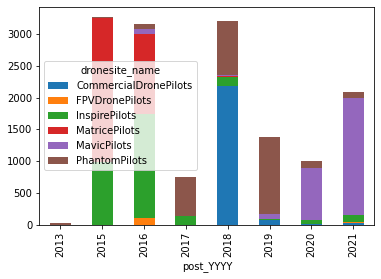

In [ ]:
dfDronePosts.groupby('post_YYYY')['dronesite_name']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

**Take posts from 2018 onwards**

In [ ]:
dfSince2018 = dfDronePosts[dfDronePosts['post_YYYY'] >= '2018'][['dronesite_group', 'thread_name', 'post_YYMM', 'post_YYYY', 'post_text']]
display(dfSince2018)

,dronesite_group,thread_name,post_YYMM,post_YYYY,post_text
0,Private,Latest CASA newsletter re VLOS,2110,2021,..\nLatest CASA newsletter has VLOS article wh...
1,Private,Latest CASA newsletter re VLOS,2110,2021,I'm guessing they're making a distinction betw...
2,Private,Latest CASA newsletter re VLOS,2110,2021,"If it’s like the US, the expectation is to use..."
3,Private,Latest CASA newsletter re VLOS,2110,2021,CASA is not trying to tell us to keep our eyes...
4,Private,Latest CASA newsletter re VLOS,2110,2021,\n\nthispilothere said:\n\n\n\nI'm guessing th...
...,...,...,...,...,...
12146,Commercial,Litchi wapoint missions,2007,2020,Would anyone be interested in flying gently cu...
12200,Commercial,Beseno Castle in 6K,1903,2019,\n\n\n\n\nCastel Beseno is an impressive fortr...
12457,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,\n\n\n\nAerial footage of one of Italy's hidde...
12458,Commercial,Val Formazza Mountains and a stunning Waterfal...,1804,2018,"As always, your video is stunning. As good as ..."


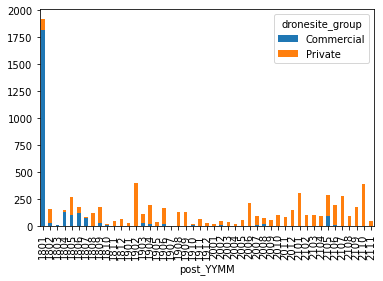

In [ ]:
dfSince2018.groupby('post_YYMM')['dronesite_group']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

In [ ]:
dfSince2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7668 entries, 0 to 14842
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   dronesite_group  7668 non-null   object
 1   thread_name      7668 non-null   object
 2   post_YYMM        7668 non-null   object
 3   post_YYYY        7668 non-null   object
 4   post_text        7667 non-null   object
dtypes: object(5)
memory usage: 359.4+ KB


In [ ]:
dfSince2018.to_csv('/content/drive/MyDrive/DronePostsSince2018_202112041100.csv')